Trying to reproduce the Figure 6 in **On the difficulty of training recurrent neural networks** (http://proceedings.mlr.press/v28/pascanu13.pdf) that shows wall on the loss landscape of RNN

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib as mlp
from matplotlib import cm

import numpy as np

mlp.style.use('classic')

In [2]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

In [3]:
def recurrent(w, b=0, steps=50):
    # Eq. 8 in http://proceedings.mlr.press/v28/pascanu13.pdf
    """steps=50 is from the paper, no input: meaning at each time step there is only hidden input from the previous step"""
    x_prev = 0
    for i in range(steps):
        x = w * sigmoid(x_prev) + b
        x_prev = x
    return x

In [4]:
def loss(w, b=0, steps=50, target=1):
    return np.square(recurrent(w, b, steps) - target)

In [5]:
%matplotlib notebook

# First, show the landscape around the region shown in the paper

In [6]:
xlim = (4.5, 5.4)
ylim = (-3, -1)

ws = np.arange(*xlim, 0.005)
bs = np.arange(*ylim, 0.005)

X0, Y0 = np.meshgrid(ws, bs)
# the target=1 is a guess, not sure what it is exactly in the paper, but it turns out to be a reasonable guess
Z0 = loss(X0, Y0, target=1)

<IPython.core.display.Javascript object>


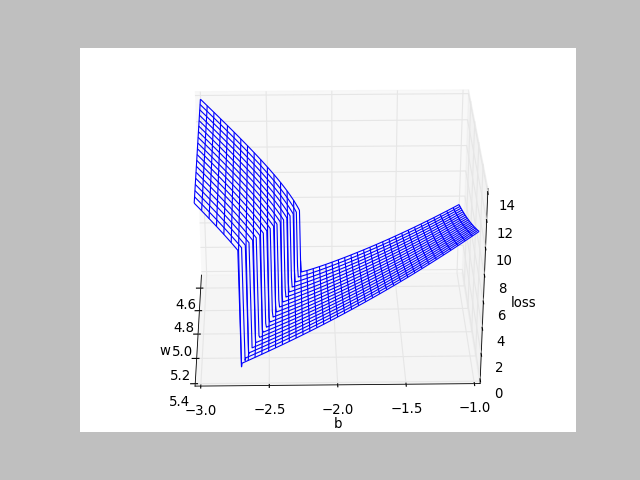

(-3, -1)

In [7]:
fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection='3d')

# surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
surf = ax.plot_wireframe(X0, Y0, Z0, rstride=10, cstride=10)
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss')

ax.set_xlim(4.5, 5.4)
ax.set_ylim(-3, -1)

# Now, see a bigger picture

<IPython.core.display.Javascript object>


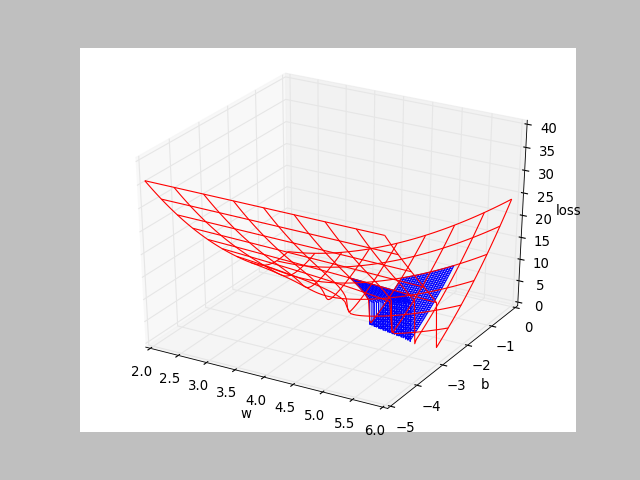

(-5, 0)

In [8]:
xlim = (2, 6)
ylim = (-5, 0)

ws = np.arange(*xlim, 0.05)
bs = np.arange(*ylim, 0.05)

X1, Y1 = np.meshgrid(ws, bs)
# the target=1 is a guess, not sure what it is exactly in the paper, but it turns out to be a reasonable guess
Z1 = loss(X1, Y1, target=1)

fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection='3d')

surf1 = ax.plot_wireframe(X1, Y1, Z1, rstride=10, cstride=10, color='red')
surf0 = ax.plot_wireframe(X0, Y0, Z0, rstride=10, cstride=10, color='blue')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

# An even wide picture

<IPython.core.display.Javascript object>


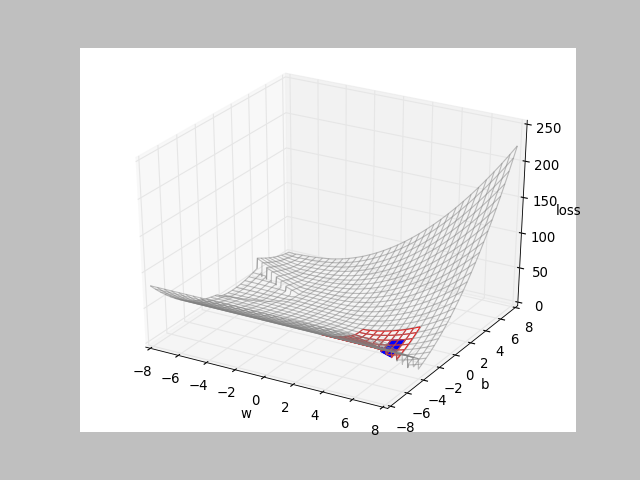

(-8, 8)

In [9]:
xlim = (-8, 8)
ylim = (-8, 8)

ws = np.arange(*xlim, 0.05)
bs = np.arange(*ylim, 0.05)

X2, Y2 = np.meshgrid(ws, bs)
Z2 = loss(X2, Y2, target=1)

fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection='3d')

surf2 = ax.plot_wireframe(X2, Y2, Z2, rstride=10, cstride=10, color='grey', alpha=0.5)
surf1 = ax.plot_wireframe(X1, Y1, Z1, rstride=10, cstride=10, color='red')
surf0 = ax.plot_wireframe(X0, Y0, Z0, rstride=10, cstride=10, color='blue')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

You could see there are walls around b=[2,4] & w=[-2,-6] region, too, and what's shown in the paper is just a tiny region.

<IPython.core.display.Javascript object>


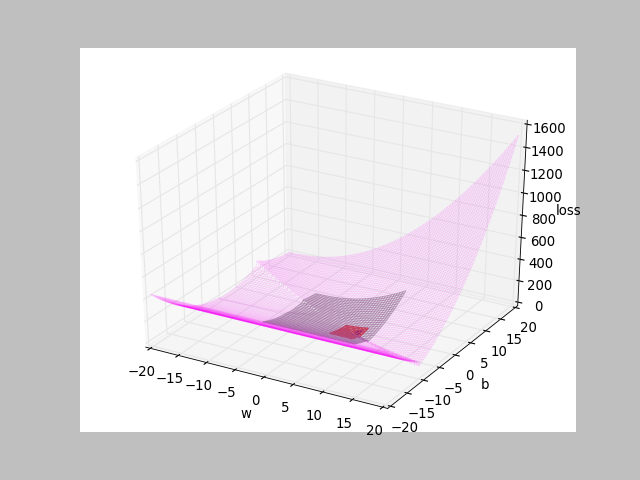

(-20, 20)

In [10]:
xlim = (-20, 20)
ylim = (-20, 20)

ws = np.arange(*xlim, 0.05)
bs = np.arange(*ylim, 0.05)

X3, Y3 = np.meshgrid(ws, bs)
Z3 = loss(X3, Y3, target=1)

fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection='3d')

surf3 = ax.plot_wireframe(X3, Y3, Z3, rstride=10, cstride=10, color='magenta', alpha=0.1)
surf2 = ax.plot_wireframe(X2, Y2, Z2, rstride=10, cstride=10, color='grey', alpha=0.5)
surf1 = ax.plot_wireframe(X1, Y1, Z1, rstride=10, cstride=10, color='red')
surf0 = ax.plot_wireframe(X0, Y0, Z0, rstride=10, cstride=10, color='blue')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

See that wall forms a cliff to each side and fades when w and b are around 0.

# Show the cliff formation as the number of recurrences (steps) increases

<IPython.core.display.Javascript object>


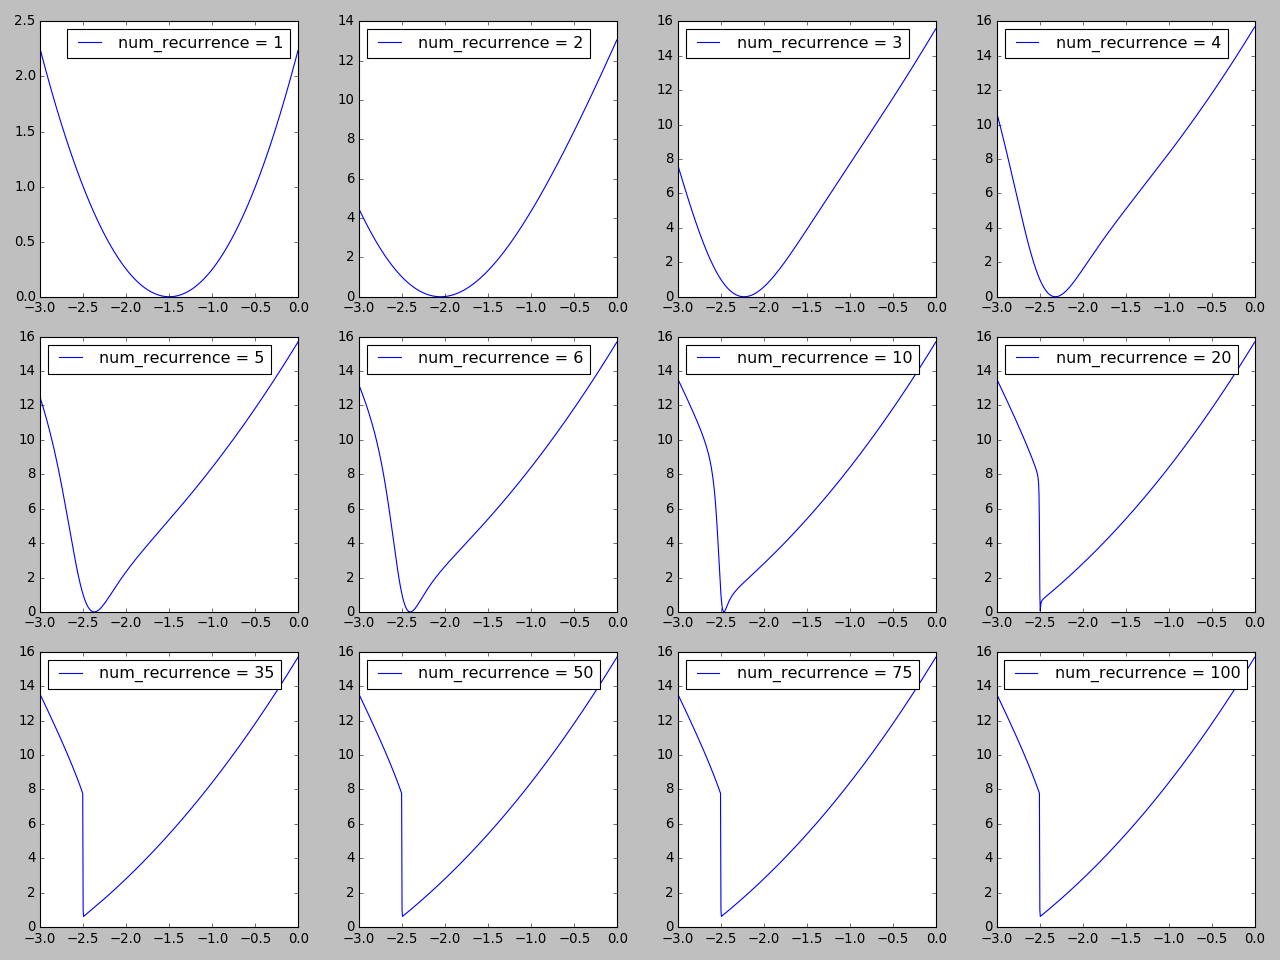

In [11]:
xlim = (-3, 0)

w_const = 5 # fix w
bs = np.arange(*xlim, 0.005)

fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.ravel()

for k, steps in enumerate([1, 2, 3, 4, 5, 6, 10, 20, 35, 50, 75, 100]):
    ax = axes[k]
    ys = loss(w_const, bs, steps=steps, target=1)
    ax.plot(bs, ys, label='num_recurrence = {0}'.format(steps))
    ax.legend(loc='best')
plt.tight_layout()

Below are backup code, please ignore.

In [ ]:
# xlims = [
#     (4.5, 5.4),
#     (2, 6),
#     (-7, 7),
# ]
# ylims = [
#     (-3, -1),
#     (-5, 0),
#     (-7, 7),
# ]

# for k, (xlim, ylim) in zip(xlims, ylims):
#     ws = np.arange(*xlim, 0.005)
#     bs = np.arange(*ylim, 0.005)

#     X, Y = np.meshgrid(ws, bs)
#     # the target=1 is a guess, not sure what it is exactly in the paper, but it turns out to be a reasonable guess
#     Z = loss(X, Y, target=1)